## Team Zero Budget

#### Part -1

Aanal Patel	C0910376

Jayachandhran Saravanan	C0910392

Danilo Diaz	C0889539

Ernie Sumoso	C0881591

Yogita Sharma c0913011



## importing important libraries and packages 


##### more credits to the in-class activity and the google developers documentation provided about youtube API, https://developers.google.com/youtube/v3/docs

In [3]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from googleapiclient.errors import HttpError

## this is the build module having all the config settings 

In [ ]:
#using GCP youtube v3 API services


api_key='' # the API keys are removed to avoid security issues

channel_id='UCn4rEMqKtwBQ6-oEwbd4PcA' ## this is demo testing to check my API credentials are working or not

youtube= build('youtube','v3',developerKey=api_key) #build engine

## Fetching 

#### all the youtube video IDs from the CSV file using the pandas

1. we recieved error messages on the fetching the contents in youtube - exceeding the limit for the day
2. so, we used the split approach by dividing the whole id list into two halves and making the request for consecutive days
3. Stored the resutls as csv and later concadiated the dataframes

In [ ]:
df_csv = pd.read_csv('links_1.csv')

In [ ]:
#created a list of youtube ids for easy access

In [ ]:
video_list = df_csv['youtubeId'].astype(str).tolist()

### Video_list has all the ids 

In [ ]:
# checking the number of video IDs

In [ ]:
len(video_list)

### Function to get the 100 comments from the video ID


In [ ]:


def task_45(video_id=None):
    
    """
    :func task_45 : functions to fetch top 100 comments irrespetive of order and their user IDs based on the video_id
    :args video_id : input for this function, which will be passed as string
    :returns : list of dict, containing the comments
    :raises: errors on youtube API request
    """
    #creating an empty list 
    lst=[]

    #using try and exception for the fetching the comments of the particular ID
    try:
        vid = video_id
        video_responses = youtube.commentThreads().list(part='snippet, replies',videoId=vid, maxResults=100).execute() # part is very important, we used snippet for first key value and the replies for the inherited key values

        #note: we removed the replies part,as it takes more time and processing power
        
        count = 0 #counter for reference on the cross checking the comment count

        #comment retrival loop and created a dict to gather all the comments
        for item in video_responses['items']:
            
            totl={} 
            count +=1
            totl['comment'] = item['snippet']['topLevelComment']['snippet']['textDisplay']     
            totl['user_id']=item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
            lst.append(totl)
            
    except HttpError as e:
        print('there is error jai here')
        raise e  
    
    return lst

     

## basic_video function is used to get the main parameters

In [58]:
def basic_video(youtube,video_id):
    
    """
    :func : use the api_key to fetch details of youtube video using GCP API service and resources
    :args youtube : build resource parameter, having personal API key and requesting service name
    : args video_id: list of video ids given --> array of strings.
    :return dict: details of the video in different d_format.
    """
    
    # print(len(video_id)/2)
    lst=[] #empty list
    
    for i in range(0,len(video_id),50): #youtube allows only 50 videos per request so passing in multiples of 50 increaments
        
        print(f"now going through of {i}/len(vidvideo_id)") #this is used as visual reference on the whole process
        
        request = youtube.videos().list(part='snippet,statistics,contentDetails',id=','.join(video_id[i:i+50])) #used join methoed during demo and felt it can be used for all the cases 
        response=request.execute() # the response is having all the details in JSON format

        #loop of each video details 
        for i in response['items']: #items is main key value of the JSON
            print(f"now_id:{i['id']}") #tracker of which is ID is last used to make the API call
            
            details=dict() #creating a empty dict for stroing the values 
            details['title']=i['snippet']['title']
            details['desc']=i['snippet']['description']
            details['Date']=i['snippet']['publishedAt']

            #while running initally, some errors are raised due to comment disabled situation
            try:
                details['comments'] = task_45(video_id= i['id'])
            except HttpError as e:
                if e.resp.status== 403: #this is repetative error raised
                    print(f"Comments disabled{i['id']}. Skip it for now...")
                    details['comments'] = []
                else:
                    print(f"Error {i['id']}: {e}")
                    details['comments'] = []
                    
            #there was an error in accessing the contentDetails tag, so the check is created for durtaion and other count values 
            
            if 'contentDetails' in i:
                details['duration']=i['contentDetails']['duration']
            else:
                details['duration']=np.nan
                
            #null value check
            check=['viewCount','likeCount','commentCount','favoriteCount']
            for j in check:
                if j in i['statistics']:
                    details[j]=i['statistics'][j]
                else:
                    details[j]=np.nan
                    
            #final append
            lst.append(details)
            
    return lst
    
    

In [ ]:
### Total number of ids are verified and tallied with the CSV sheet

In [ ]:
# temp=video_list[:49] ## i tried to test only for first 50 entries 

In [ ]:

# 11750

In [ ]:
# 11750

In [ ]:
# 

In [ ]:
# 12811*2

## calling function

#### for me it tooks 20 to 30 mins (based on my internet connections)

In [ ]:
data_=basic_video(youtube,video_list)

## creating a pandas data frame

In [ ]:
sample_pd=pd.DataFrame(data_) #converting it to the pandas dataframe

In [ ]:
sample_pd

## start running the cells from here

In [5]:

df1 = pd.read_csv('first_table.csv')
df2 = pd.read_csv('last_table_sec_day_limt.csv')

# Concatenate 
merged_df = pd.concat([df1, df2], ignore_index=True)

sample_pd=merged_df.copy()

## sompe data cleansing steps and format conversion

In [7]:
#data conversion for date and number values 
sample_pd['Date']=pd.to_datetime(sample_pd['Date']).dt.date
sample_pd['viewCount']=pd.to_numeric(sample_pd['viewCount'])
sample_pd['likeCount']=pd.to_numeric(sample_pd['likeCount'])
sample_pd['commentCount']=pd.to_numeric(sample_pd['commentCount'])
sample_pd['favoriteCount']=pd.to_numeric(sample_pd['favoriteCount'])

In [8]:
sample_pd

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0
1,1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09,comments_disabled,PT2M48S,199055.0,286.0,NaN,0
2,2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26,[{'comment': 'Buena película de comedia románt...,PT1M52S,224358.0,221.0,13.0,0
3,3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23,comments_disabled,PT2M40S,437779.0,NaN,NaN,0
4,4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29,[{'comment': 'The scene in which the lady with...,PT2M28S,1507169.0,8245.0,681.0,0
...,...,...,...,...,...,...,...,...,...,...
18020,8431,О чем говорят мужчины-Трейлер,"От создателей фильмов ""День выборов"" и ""День р...",2010-01-15,"[{'comment': 'Песня Би-2, &quot;Реки любви&quo...",PT2M30S,513404.0,380.0,28.0,0
18021,8432,Three Quarter Moon Trailer,,2012-06-11,[],PT2M15S,1996.0,6.0,0.0,0
18022,8433,Brother Bear 2,Kenai takes an exciting adventure he never dre...,2012-01-04,comments_disabled,PT1M26S,1809800.0,NaN,NaN,0
18023,8434,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,2010-06-12,[{'comment': 'Too bad training videos can&#39;...,PT9M20S,2578896.0,32150.0,1643.0,0


In [12]:
#saving the df into csv for future use

In [14]:
# sample_pd.to_csv('first_table.csv')

## merging the tables into one

In [17]:
df1.shape

(9589, 10)

In [19]:
df2.shape

(8436, 10)

In [21]:
merged_df.shape

(18025, 10)

In [23]:
sample_pd

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0
1,1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09,comments_disabled,PT2M48S,199055.0,286.0,NaN,0
2,2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26,[{'comment': 'Buena película de comedia románt...,PT1M52S,224358.0,221.0,13.0,0
3,3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23,comments_disabled,PT2M40S,437779.0,NaN,NaN,0
4,4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29,[{'comment': 'The scene in which the lady with...,PT2M28S,1507169.0,8245.0,681.0,0
...,...,...,...,...,...,...,...,...,...,...
18020,8431,О чем говорят мужчины-Трейлер,"От создателей фильмов ""День выборов"" и ""День р...",2010-01-15,"[{'comment': 'Песня Би-2, &quot;Реки любви&quo...",PT2M30S,513404.0,380.0,28.0,0
18021,8432,Three Quarter Moon Trailer,,2012-06-11,[],PT2M15S,1996.0,6.0,0.0,0
18022,8433,Brother Bear 2,Kenai takes an exciting adventure he never dre...,2012-01-04,comments_disabled,PT1M26S,1809800.0,NaN,NaN,0
18023,8434,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,2010-06-12,[{'comment': 'Too bad training videos can&#39;...,PT9M20S,2578896.0,32150.0,1643.0,0


In [25]:
merged_df.head()

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0
1,1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09,comments_disabled,PT2M48S,199055.0,286.0,NaN,0
2,2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26,[{'comment': 'Buena película de comedia románt...,PT1M52S,224358.0,221.0,13.0,0
3,3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23,comments_disabled,PT2M40S,437779.0,NaN,NaN,0
4,4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29,[{'comment': 'The scene in which the lady with...,PT2M28S,1507169.0,8245.0,681.0,0


## getting the time parameters using the regex paramter

In [28]:
import re
def get_time(duration):

    """
    :func : to get the time from the text day present in the data
    :args duration : the time in text PTHMS format
    :return int: different measurement of time from the duration parameter
    """
    #Regex using groups
    pattern = r"P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?" #creating groups on each time paramters based on PR and M and S strings
    matches = re.match(pattern, duration) #applying regex match method
    
    if matches: 
        days = int(matches.group(1)) if matches.group(1) else 0
        hours = int(matches.group(2)) if matches.group(2) else 0
        minutes = int(matches.group(3)) if matches.group(3) else 0
        seconds = int(matches.group(4)) if matches.group(4) else 0
        return pd.Timedelta(days=days,hours=hours, minutes=minutes, seconds=seconds)

    else:
        raise ValueError(f"Invalid duration format: {duration}")
    
sample_pd['time_cleaned'] = sample_pd['duration'].apply(get_time)


# Extract duration days,hrs,mins and secs wise
sample_pd['Days'] = sample_pd['time_cleaned'].dt.components.days
sample_pd['Hours'] = sample_pd['time_cleaned'].dt.components.hours
sample_pd['Minutes'] = sample_pd['time_cleaned'].dt.components.minutes
sample_pd['Seconds'] = sample_pd['time_cleaned'].dt.components.seconds

sample_pd['total_n_seconds'] = sample_pd['time_cleaned'].dt.total_seconds()



In [30]:
# merged_df.to_csv('merged_df.csv')

## testing the sorting method once

In [34]:
top10_views=sample_pd.sort_values(by='viewCount',ascending=False).head(10) #top 10 sortings 

#need to change this to function ## important ##

In [36]:
top10_views

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0
17417,7828,Beastie Boys - Sabotage (Official Music Video),Official music video for “Sabotage.” REMASTERE...,2009-06-22,[{'comment': 'You have immunity Catherine.... ...,PT3M4S,1.334254e+08,850551.0,32233.0,0,0 days 00:03:04,0,0,3,4,184.0
3968,3968,Unfaithful (2002) - The Other Woman Scene (1/3...,Unfaithful movie clips: http://j.mp/1ixkUnl\nB...,2015-10-13,[{'comment': 'What did she see in that loser?'...,PT2M43S,1.277029e+08,72461.0,3959.0,0,0 days 00:02:43,0,0,2,43,163.0
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0
16165,6576,ILO ILO 爸媽不在家 Official Trailer,Trailer for ILO ILO 爸媽不在家\n\nOfficial Website:...,2013-04-23,comments_disabled,PT1M49S,9.166847e+07,80376.0,NaN,0,0 days 00:01:49,0,0,1,49,109.0
10592,1003,Growth Trailer,"Here is the trailer for Growth, the latest fil...",2009-09-17,"[{'comment': 'is it like Slither?', 'user_id':...",PT2M6S,7.317965e+07,35949.0,29.0,0,0 days 00:02:06,0,0,2,6,126.0
11983,2394,Transformers 3 Dark of the Moon Teaser Trailer...,Subscribe! http://YouTube.com/ClevverTV\n\nWat...,2010-12-10,[{'comment': 'Fun fact: Sentinel&#39;s facial ...,PT2M28S,5.311235e+07,108271.0,22157.0,0,0 days 00:02:28,0,0,2,28,148.0
17905,8316,Disney's Frozen Fever Trailer,"On March 13, it's the perfect day for a new Fr...",2015-02-25,comments_disabled,PT40S,5.126004e+07,107991.0,0.0,0,0 days 00:00:40,0,0,0,40,40.0
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0


In [37]:
## Top 10 comments

## creating a function module to get sorting both in ascending and descending order

In [41]:
def max_min_stat(df,column,flag):
    temp=df.sort_values(by=column,ascending=flag).head(10)
    return temp

#repeat ---> modify it to single func

## Top 10 comments

In [45]:
top10_cmts=sample_pd.sort_values(by='commentCount',ascending=False).head(10)



In [47]:
top10_cmts

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0
17360,7771,Kiwi!,"My Master's Thesis Animation, which I complete...",2006-06-28,[{'comment': 'NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,PT3M10S,4.865389e+07,653887.0,75412.0,0,0 days 00:03:10,0,0,3,10,190.0
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0
10882,1293,Inside The Twin Towers,"Aired on September 3, 2006 on The Discovery Ch...",2013-01-18,[{'comment': 'Everything about this video is j...,PT1H31M49S,2.737082e+07,149481.0,47878.0,0,0 days 01:31:49,0,1,31,49,5509.0
14211,4622,Man of Steel - Official Trailer #2 [HD],http://manofsteel.com\nhttp://www.facebook.com...,2012-12-11,"[{'comment': '<a href=""UCkszU2WH9gy1mb0dV-11UJ...",PT2M33S,4.291930e+07,154150.0,42642.0,0,0 days 00:02:33,0,0,2,33,153.0
14845,5256,The Hunger Games: Catching Fire - Exclusive Te...,ADVANCE TICKETS ON SALE NOW - Click Here: http...,2013-04-15,"[{'comment': 'Best movie ever', 'user_id': 'UC...",PT2M26S,3.256337e+07,188620.0,42564.0,0,0 days 00:02:26,0,0,2,26,146.0
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0
16486,6897,Too Many Cooks | Adult Swim,Too Many Cooks\nWatch Full Episodes: http://as...,2014-11-07,[{'comment': 'The font for this video is diffe...,PT11M12S,2.613661e+07,415286.0,35886.0,0,0 days 00:11:12,0,0,11,12,672.0
17413,7824,The Horribly Slow Murderer with the Extremely ...,The epic story of one man's encounter with the...,2009-10-22,[{'comment': 'This has to become a movie. I de...,PT10M17S,3.789953e+07,474012.0,33812.0,0,0 days 00:10:17,0,0,10,17,617.0


## Top 10 Likes

In [50]:
top10_likes=sample_pd.sort_values(by='likeCount',ascending=False).head(10)

#repeat ---> modify it to single func

In [52]:
top10_likes

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0
17417,7828,Beastie Boys - Sabotage (Official Music Video),Official music video for “Sabotage.” REMASTERE...,2009-06-22,[{'comment': 'You have immunity Catherine.... ...,PT3M4S,1.334254e+08,850551.0,32233.0,0,0 days 00:03:04,0,0,3,4,184.0
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0
17360,7771,Kiwi!,"My Master's Thesis Animation, which I complete...",2006-06-28,[{'comment': 'NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,PT3M10S,4.865389e+07,653887.0,75412.0,0,0 days 00:03:10,0,0,3,10,190.0
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0
17413,7824,The Horribly Slow Murderer with the Extremely ...,The epic story of one man's encounter with the...,2009-10-22,[{'comment': 'This has to become a movie. I de...,PT10M17S,3.789953e+07,474012.0,33812.0,0,0 days 00:10:17,0,0,10,17,617.0
16486,6897,Too Many Cooks | Adult Swim,Too Many Cooks\nWatch Full Episodes: http://as...,2014-11-07,[{'comment': 'The font for this video is diffe...,PT11M12S,2.613661e+07,415286.0,35886.0,0,0 days 00:11:12,0,0,11,12,672.0
17963,8374,POWER/RANGERS UNAUTHORIZED [BOOTLEG UNIVERSE],Adi Shankar Presents a Mighty Morphin' Power R...,2015-02-24,[{'comment': 'That was the greatest movie I&#3...,PT14M20S,2.570580e+07,369971.0,29793.0,0,0 days 00:14:20,0,0,14,20,860.0
16822,7233,THE PUNISHER: DIRTY LAUNDRY [BOOTLEG UNIVERSE],Adi Shankar Presents a The Punisher Bootleg Fi...,2012-07-16,"[{'comment': 'Nice product placement😆', 'user_...",PT10M15S,3.379505e+07,346486.0,32361.0,0,0 days 00:10:15,0,0,10,15,615.0


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29240 (\N{CJK UNIFIED IDEOGRAPH-7238}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23229 (\N{CJK UNIFIED IDEOGRAPH-5ABD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  fig.canvas.print_figure(b

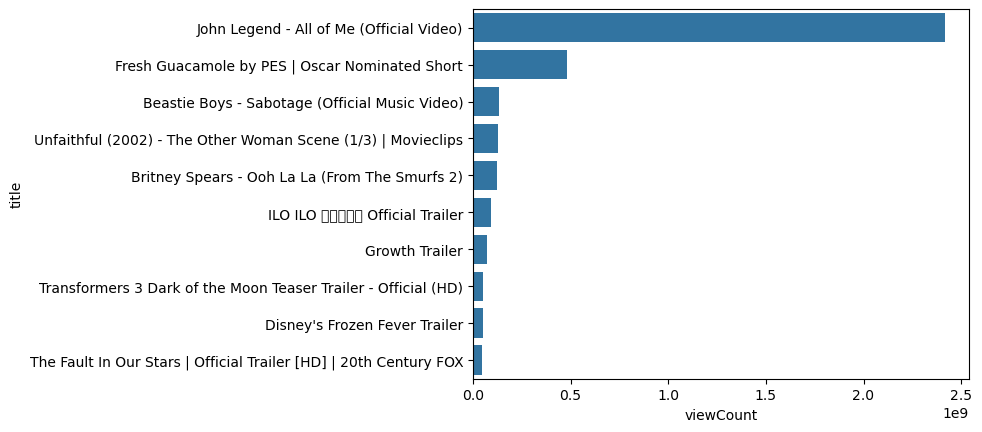

In [53]:
ax1= sns.barplot(x='viewCount',y='title', data=top10_views)
plt.show()

#plotting of bargraph

## day wise plot - extra method 

In [57]:
sample_pd['day']=pd.to_datetime(sample_pd['Date']).dt.strftime('%d') #unique plot for day-wise counts

In [59]:
sample_pd

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0,0 days 00:01:31,0,0,1,31,91.0,26
1,1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09,comments_disabled,PT2M48S,199055.0,286.0,NaN,0,0 days 00:02:48,0,0,2,48,168.0,09
2,2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26,[{'comment': 'Buena película de comedia románt...,PT1M52S,224358.0,221.0,13.0,0,0 days 00:01:52,0,0,1,52,112.0,26
3,3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23,comments_disabled,PT2M40S,437779.0,NaN,NaN,0,0 days 00:02:40,0,0,2,40,160.0,23
4,4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29,[{'comment': 'The scene in which the lady with...,PT2M28S,1507169.0,8245.0,681.0,0,0 days 00:02:28,0,0,2,28,148.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020,8431,О чем говорят мужчины-Трейлер,"От создателей фильмов ""День выборов"" и ""День р...",2010-01-15,"[{'comment': 'Песня Би-2, &quot;Реки любви&quo...",PT2M30S,513404.0,380.0,28.0,0,0 days 00:02:30,0,0,2,30,150.0,15
18021,8432,Three Quarter Moon Trailer,,2012-06-11,[],PT2M15S,1996.0,6.0,0.0,0,0 days 00:02:15,0,0,2,15,135.0,11
18022,8433,Brother Bear 2,Kenai takes an exciting adventure he never dre...,2012-01-04,comments_disabled,PT1M26S,1809800.0,NaN,NaN,0,0 days 00:01:26,0,0,1,26,86.0,04
18023,8434,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,2010-06-12,[{'comment': 'Too bad training videos can&#39;...,PT9M20S,2578896.0,32150.0,1643.0,0,0 days 00:09:20,0,0,9,20,560.0,12


In [60]:
sample_pd_date=sample_pd.groupby('day').size() #sorting 

In [63]:
sample_pd_date

day
01    538
02    552
03    621
04    597
05    711
06    568
07    585
08    627
09    608
10    728
11    644
12    542
13    610
14    571
15    622
16    610
17    568
18    587
19    604
20    612
21    590
22    600
23    600
24    526
25    524
26    543
27    552
28    586
29    563
30    526
31    310
dtype: int64

In [65]:
sample_pd_date=sample_pd.groupby('day',as_index=False).size()

In [67]:
sample_pd_date

,day,size
0,01,538
1,02,552
2,03,621
3,04,597
4,05,711
5,06,568
6,07,585
7,08,627
8,09,608
9,10,728


In [68]:
sort_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", 
 "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", 
 "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]


In [71]:
sample_pd_date.index=pd.CategoricalIndex(sample_pd_date['day'],categories=sort_order,ordered=True)

In [73]:
sample_pd_date

,day,size
day,,
NaN,01,538
NaN,02,552
NaN,03,621
NaN,04,597
NaN,05,711
NaN,06,568
NaN,07,585
NaN,08,627
NaN,09,608


In [74]:
sample_pd_date=sample_pd_date.sort_index()

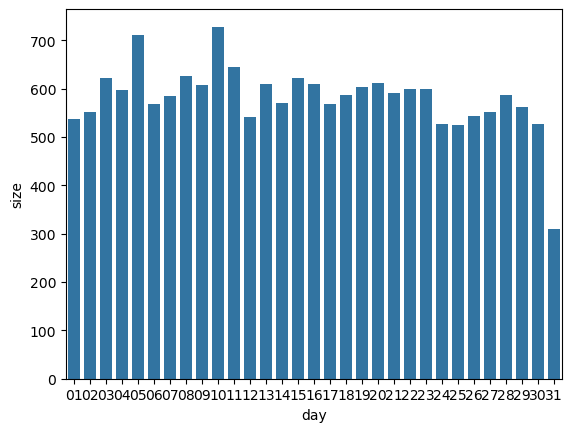

In [77]:
ax2= sns.barplot(x='day',y='size', data=sample_pd_date)
plt.show()

In [80]:
## assignment 1

1.	~100 comments~
2.	~Description of the video~
3.	~View Count~
4.	~Like Count~
5.	~Dislike Count~
6.	~Comment Count~
7.	~Duration of the video~
8.	~Favorite Count~

8/8 completed


After the data extraction is done, then please find out the following:

1.	A list of  the top-10 videos based on the total views - p
2.	A list of the bottom-10 videos based on the total views
3.	The most liked video
4.	The least liked video
5.	The video with the highest duration
6.	Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies


## Stat analysis

In [85]:
sample_pd.describe()

,Unnamed: 0,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds
count,18025.000000,1.784200e+04,1.666300e+04,16703.000000,18025.0,18025,18025.000000,18025.000000,18025.000000,18025.000000,18025.000000
mean,4524.188405,8.038851e+05,3.284868e+03,255.785188,0.0,0 days 00:06:40.005769764,0.000166,0.044216,3.291761,28.941137,400.005770
std,2633.435746,1.868633e+07,1.068404e+05,2571.711882,0.0,0 days 00:38:43.026484331,0.022345,0.243167,7.122566,16.987150,2323.026484
min,0.000000,1.700000e+01,0.000000e+00,0.000000,0.0,0 days 00:00:01,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2253.000000,2.567150e+04,6.700000e+01,5.000000,0.0,0 days 00:01:40,0.000000,0.000000,1.000000,15.000000,100.000000
50%,4506.000000,8.952400e+04,2.130000e+02,22.000000,0.0,0 days 00:02:09,0.000000,0.000000,2.000000,29.000000,129.000000
75%,6759.000000,3.348542e+05,7.880000e+02,89.000000,0.0,0 days 00:02:38,0.000000,0.000000,2.000000,43.000000,158.000000
max,9588.000000,2.418630e+09,1.332078e+07,258818.000000,0.0,3 days 02:40:22,3.000000,12.000000,59.000000,59.000000,268822.000000


## Top 10 Views

In [88]:
top10_views

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0
17417,7828,Beastie Boys - Sabotage (Official Music Video),Official music video for “Sabotage.” REMASTERE...,2009-06-22,[{'comment': 'You have immunity Catherine.... ...,PT3M4S,1.334254e+08,850551.0,32233.0,0,0 days 00:03:04,0,0,3,4,184.0
3968,3968,Unfaithful (2002) - The Other Woman Scene (1/3...,Unfaithful movie clips: http://j.mp/1ixkUnl\nB...,2015-10-13,[{'comment': 'What did she see in that loser?'...,PT2M43S,1.277029e+08,72461.0,3959.0,0,0 days 00:02:43,0,0,2,43,163.0
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0
16165,6576,ILO ILO 爸媽不在家 Official Trailer,Trailer for ILO ILO 爸媽不在家\n\nOfficial Website:...,2013-04-23,comments_disabled,PT1M49S,9.166847e+07,80376.0,NaN,0,0 days 00:01:49,0,0,1,49,109.0
10592,1003,Growth Trailer,"Here is the trailer for Growth, the latest fil...",2009-09-17,"[{'comment': 'is it like Slither?', 'user_id':...",PT2M6S,7.317965e+07,35949.0,29.0,0,0 days 00:02:06,0,0,2,6,126.0
11983,2394,Transformers 3 Dark of the Moon Teaser Trailer...,Subscribe! http://YouTube.com/ClevverTV\n\nWat...,2010-12-10,[{'comment': 'Fun fact: Sentinel&#39;s facial ...,PT2M28S,5.311235e+07,108271.0,22157.0,0,0 days 00:02:28,0,0,2,28,148.0
17905,8316,Disney's Frozen Fever Trailer,"On March 13, it's the perfect day for a new Fr...",2015-02-25,comments_disabled,PT40S,5.126004e+07,107991.0,0.0,0,0 days 00:00:40,0,0,0,40,40.0
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0


## Top 10 Likes

In [91]:
top10_likes

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0
17417,7828,Beastie Boys - Sabotage (Official Music Video),Official music video for “Sabotage.” REMASTERE...,2009-06-22,[{'comment': 'You have immunity Catherine.... ...,PT3M4S,1.334254e+08,850551.0,32233.0,0,0 days 00:03:04,0,0,3,4,184.0
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0
17360,7771,Kiwi!,"My Master's Thesis Animation, which I complete...",2006-06-28,[{'comment': 'NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,PT3M10S,4.865389e+07,653887.0,75412.0,0,0 days 00:03:10,0,0,3,10,190.0
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0
17413,7824,The Horribly Slow Murderer with the Extremely ...,The epic story of one man's encounter with the...,2009-10-22,[{'comment': 'This has to become a movie. I de...,PT10M17S,3.789953e+07,474012.0,33812.0,0,0 days 00:10:17,0,0,10,17,617.0
16486,6897,Too Many Cooks | Adult Swim,Too Many Cooks\nWatch Full Episodes: http://as...,2014-11-07,[{'comment': 'The font for this video is diffe...,PT11M12S,2.613661e+07,415286.0,35886.0,0,0 days 00:11:12,0,0,11,12,672.0
17963,8374,POWER/RANGERS UNAUTHORIZED [BOOTLEG UNIVERSE],Adi Shankar Presents a Mighty Morphin' Power R...,2015-02-24,[{'comment': 'That was the greatest movie I&#3...,PT14M20S,2.570580e+07,369971.0,29793.0,0,0 days 00:14:20,0,0,14,20,860.0
16822,7233,THE PUNISHER: DIRTY LAUNDRY [BOOTLEG UNIVERSE],Adi Shankar Presents a The Punisher Bootleg Fi...,2012-07-16,"[{'comment': 'Nice product placement😆', 'user_...",PT10M15S,3.379505e+07,346486.0,32361.0,0,0 days 00:10:15,0,0,10,15,615.0


In [92]:
max_min_stat(sample_pd,'likeCount',1)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
6286,6286,ALL AT SEA (1 of 3),video von Patrick Rieve. film ist teil der ins...,2010-12-29,[],PT9M27S,366.0,0.0,0.0,0,0 days 00:09:27,0,0,9,27,567.0,29
14173,4584,"Introduction - Hilton, 2013",,2013-01-11,[],PT18S,17.0,0.0,0.0,0,0 days 00:00:18,0,0,0,18,18.0,11
1359,1359,The Big Band Convention - Live 02.07.1998 - Lo...,"Mit ""The Big Band Convention"" hat sich in der ...",2015-10-13,[],PT3M30S,248.0,0.0,0.0,0,0 days 00:03:30,0,0,3,30,210.0,13
489,489,Bread & Chocolate 3,Bread & Chocolate 3,2010-12-18,[],PT9M32S,1562.0,0.0,0.0,0,0 days 00:09:32,0,0,9,32,572.0,18
15229,5640,Paranoia Agent (2004) Anime Review,Twitter: https://twitter.com/justcallmeques\n\...,2016-05-03,[],PT3M6S,117.0,0.0,0.0,0,0 days 00:03:06,0,0,3,6,186.0,03
17048,7459,"TIFF Festival Movie Review- Supermensch, Words...",In this installment: I talk about Mike Myers f...,2013-10-08,[],PT4M9S,1927.0,0.0,0.0,0,0 days 00:04:09,0,0,4,9,249.0,08
16901,7312,Flesh and Blood (1922),Directed by Irving Cummings\nStarring:\nLon Ch...,2016-02-10,[],PT1H13M19S,97.0,0.0,0.0,0,0 days 01:13:19,0,1,13,19,4399.0,10
17842,8253,That's Life (1998): Where Are They Now?,"find out what ever happen to the 1998 TV show,...",2014-03-10,[{'comment': 'Gerry Wilson was one of my best ...,PT5M18S,599.0,0.0,1.0,0,0 days 00:05:18,0,0,5,18,318.0,10
12005,2416,Tre Fratelli - Three Brothers | Movie,"Movie made by Ryan, Dylan and Victor for FVP 1...",2012-01-28,[],PT8M28S,751.0,0.0,0.0,0,0 days 00:08:28,0,0,8,28,508.0,28
13637,4048,Presidential Election 2008- Electile Dysfunction,Presidential Candidates debate.,2008-04-13,[],PT1M6S,162.0,0.0,0.0,0,0 days 00:01:06,0,0,1,6,66.0,13


## bottom 10 Likes

In [97]:
max_min_stat(sample_pd,'likeCount',0)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0,02
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0,07
17417,7828,Beastie Boys - Sabotage (Official Music Video),Official music video for “Sabotage.” REMASTERE...,2009-06-22,[{'comment': 'You have immunity Catherine.... ...,PT3M4S,1.334254e+08,850551.0,32233.0,0,0 days 00:03:04,0,0,3,4,184.0,22
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0,11
17360,7771,Kiwi!,"My Master's Thesis Animation, which I complete...",2006-06-28,[{'comment': 'NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...,PT3M10S,4.865389e+07,653887.0,75412.0,0,0 days 00:03:10,0,0,3,10,190.0,28
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0,29
17413,7824,The Horribly Slow Murderer with the Extremely ...,The epic story of one man's encounter with the...,2009-10-22,[{'comment': 'This has to become a movie. I de...,PT10M17S,3.789953e+07,474012.0,33812.0,0,0 days 00:10:17,0,0,10,17,617.0,22
16486,6897,Too Many Cooks | Adult Swim,Too Many Cooks\nWatch Full Episodes: http://as...,2014-11-07,[{'comment': 'The font for this video is diffe...,PT11M12S,2.613661e+07,415286.0,35886.0,0,0 days 00:11:12,0,0,11,12,672.0,07
17963,8374,POWER/RANGERS UNAUTHORIZED [BOOTLEG UNIVERSE],Adi Shankar Presents a Mighty Morphin' Power R...,2015-02-24,[{'comment': 'That was the greatest movie I&#3...,PT14M20S,2.570580e+07,369971.0,29793.0,0,0 days 00:14:20,0,0,14,20,860.0,24
16822,7233,THE PUNISHER: DIRTY LAUNDRY [BOOTLEG UNIVERSE],Adi Shankar Presents a The Punisher Bootleg Fi...,2012-07-16,"[{'comment': 'Nice product placement😆', 'user_...",PT10M15S,3.379505e+07,346486.0,32361.0,0,0 days 00:10:15,0,0,10,15,615.0,16


## Top 10 Views

In [100]:
max_min_stat(sample_pd,'viewCount',1)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
14173,4584,"Introduction - Hilton, 2013",,2013-01-11,[],PT18S,17.0,0.0,0.0,0,0 days 00:00:18,0,0,0,18,18.0,11
17855,8266,Elinor Murphy (The Long Afternoon live @ Chron...,Reclusive indie pioneers The Long Afternoon pe...,2012-08-03,[],PT3M34S,45.0,1.0,0.0,0,0 days 00:03:34,0,0,3,34,214.0,03
16468,6879,Freedom 2009,Cabrainnnnnnnn,2013-03-15,[],PT1M1S,46.0,0.0,0.0,0,0 days 00:01:01,0,0,1,1,61.0,15
15011,5422,Cornerstone Festival Wooden Bridge (2012),Cornerstone Wooden Bridge,2015-02-22,[],PT58S,46.0,0.0,0.0,0,0 days 00:00:58,0,0,0,58,58.0,22
15470,5881,me with warheads two(2008),warheads they are sour,2009-01-15,[],PT56S,52.0,0.0,0.0,0,0 days 00:00:56,0,0,0,56,56.0,15
16901,7312,Flesh and Blood (1922),Directed by Irving Cummings\nStarring:\nLon Ch...,2016-02-10,[],PT1H13M19S,97.0,0.0,0.0,0,0 days 01:13:19,0,1,13,19,4399.0,10
14389,4800,rafa 2012,,2012-12-31,[],PT6M10S,108.0,2.0,0.0,0,0 days 00:06:10,0,0,6,10,370.0,31
15131,5542,American Scary (2006) Trailer,American Scary,2014-03-26,[],PT2M40S,112.0,0.0,0.0,0,0 days 00:02:40,0,0,2,40,160.0,26
15229,5640,Paranoia Agent (2004) Anime Review,Twitter: https://twitter.com/justcallmeques\n\...,2016-05-03,[],PT3M6S,117.0,0.0,0.0,0,0 days 00:03:06,0,0,3,6,186.0,03
13505,3916,"97 Percent True — ""Joyous Intoxication of Buil...",2008 Guy Maddin,2015-07-04,[],PT6M30S,145.0,2.0,0.0,0,0 days 00:06:30,0,0,6,30,390.0,04


## bottom 10 comments

In [103]:
print(sample_pd['time_cleaned'].dtype)
# print("Min value:", sample_pd['viewCount'].min())
# print("Max value:", sample_pd['viewCount'].max())

timedelta64[ns]


In [106]:
max_min_stat(sample_pd,'viewCount',0)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
15594,6005,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,2013-10-02,[{'comment': '極少數黑人裡(美國) 不是穿耳洞屁孩 噁爛種<br>簡直是極品'...,PT5M8S,2.418630e+09,13320784.0,258818.0,0,0 days 00:05:08,0,0,5,8,308.0,02
16987,7398,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,2013-03-07,[{'comment': 'Just discovered this art. If coo...,PT1M41S,4.800381e+08,2922334.0,74179.0,0,0 days 00:01:41,0,0,1,41,101.0,07
17417,7828,Beastie Boys - Sabotage (Official Music Video),Official music video for “Sabotage.” REMASTERE...,2009-06-22,[{'comment': 'You have immunity Catherine.... ...,PT3M4S,1.334254e+08,850551.0,32233.0,0,0 days 00:03:04,0,0,3,4,184.0,22
3968,3968,Unfaithful (2002) - The Other Woman Scene (1/3...,Unfaithful movie clips: http://j.mp/1ixkUnl\nB...,2015-10-13,[{'comment': 'What did she see in that loser?'...,PT2M43S,1.277029e+08,72461.0,3959.0,0,0 days 00:02:43,0,0,2,43,163.0,13
14419,4830,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,2013-07-11,[{'comment': 'me nencanta esta cancion una vez...,PT4M21S,1.250566e+08,811610.0,59213.0,0,0 days 00:04:21,0,0,4,21,261.0,11
16165,6576,ILO ILO 爸媽不在家 Official Trailer,Trailer for ILO ILO 爸媽不在家\n\nOfficial Website:...,2013-04-23,comments_disabled,PT1M49S,9.166847e+07,80376.0,NaN,0,0 days 00:01:49,0,0,1,49,109.0,23
10592,1003,Growth Trailer,"Here is the trailer for Growth, the latest fil...",2009-09-17,"[{'comment': 'is it like Slither?', 'user_id':...",PT2M6S,7.317965e+07,35949.0,29.0,0,0 days 00:02:06,0,0,2,6,126.0,17
11983,2394,Transformers 3 Dark of the Moon Teaser Trailer...,Subscribe! http://YouTube.com/ClevverTV\n\nWat...,2010-12-10,[{'comment': 'Fun fact: Sentinel&#39;s facial ...,PT2M28S,5.311235e+07,108271.0,22157.0,0,0 days 00:02:28,0,0,2,28,148.0,10
17905,8316,Disney's Frozen Fever Trailer,"On March 13, it's the perfect day for a new Fr...",2015-02-25,comments_disabled,PT40S,5.126004e+07,107991.0,0.0,0,0 days 00:00:40,0,0,0,40,40.0,25
15711,6122,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,2014-01-29,[{'comment': 'Honestly I haven&#39;t watched t...,PT2M30S,4.877254e+07,609669.0,39897.0,0,0 days 00:02:30,0,0,2,30,150.0,29


In [108]:
max_duration = sample_pd['time_cleaned'].max()
min_duration = sample_pd['time_cleaned'].min()
mean_duration = sample_pd['time_cleaned'].mean()
total_duration = sample_pd['time_cleaned'].sum()

In [110]:
max_duration

Timedelta('3 days 02:40:22')

In [112]:
min_duration

Timedelta('0 days 00:00:01')

In [114]:
mean_duration

Timedelta('0 days 00:06:40.005769764')

In [116]:
total_duration

Timedelta('83 days 10:48:24')

In [118]:
max_min_stat(sample_pd,'Hours',1)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0,0 days 00:01:31,0,0,1,31,91.0,26
11822,2233,Water For Elephants - Official Trailer | HQ,Water for Elephants is an upcoming 2011 drama ...,2011-01-20,[{'comment': 'I just finished the book last ni...,PT1M57S,272214.0,414.0,74.0,0,0 days 00:01:57,0,0,1,57,117.0,20
11823,2234,Love and Savagery - Official Trailer,Love and Savagery - Official Trailer,2010-02-01,"[{'comment': 'chubby or fit, Allan Hawco is ho...",PT1M47S,53223.0,56.0,2.0,0,0 days 00:01:47,0,0,1,47,107.0,01
11824,2235,Original Theatrical Trailer | Yolanda and the ...,Yolanda and the Thief (1945) #WarnerArchive #W...,2011-03-11,[{'comment': 'i decoded my name because of Yol...,PT2M46S,13779.0,73.0,11.0,0,0 days 00:02:46,0,0,2,46,166.0,11
11825,2236,The Horseman Trailer,"Trailer for new Australian Revenge Thriller, T...",2007-12-04,[{'comment': 'Wow that kind of revenge movie I...,PT1M57S,241073.0,154.0,47.0,0,0 days 00:01:57,0,0,1,57,117.0,04
11826,2237,Foo Fighters Trailer,Wasting Light out now ! \r\nBuy here http://ww...,2011-03-12,"[{'comment': 'Rip Taylor', 'user_id': 'UCkLfux...",PT1M33S,940941.0,5290.0,756.0,0,0 days 00:01:33,0,0,1,33,93.0,12
11827,2238,THE LIGHT BULB CONSPIRACY (trailer),Trailer for the documentary film THE LIGHT BUL...,2011-01-28,[{'comment': 'Reminds me - As one who didn&#39...,PT2M23S,158138.0,756.0,54.0,0,0 days 00:02:23,0,0,2,23,143.0,28
11828,2239,The Names of Love (2011) Official Trailer,The Names of Love (French: Le Nom des gens) is...,2011-06-24,"[{'comment': 'Mm', 'user_id': 'UCShNvfhxXgX-CF...",PT1M59S,1960733.0,1243.0,34.0,0,0 days 00:01:59,0,0,1,59,119.0,24
11829,2240,Storm (2009) | Trailer | Kerry Fox | Anamaria ...,"Hannah Maynard, a prosecutor of Hague's Tribun...",2009-10-23,"[{'comment': 'God66 all simulation', 'user_id'...",PT2M13S,59410.0,62.0,12.0,0,0 days 00:02:13,0,0,2,13,133.0,23
11830,2241,Dag och Natt - Persbrandt & Nyqvist,"Nice scene in Simon Staho's ""Dag och Natt"" [Da...",2011-06-02,[{'comment': 'Love this 2 like crazy...<br> S...,PT8M17S,23584.0,75.0,13.0,0,0 days 00:08:17,0,0,8,17,497.0,02


In [120]:
max_min_stat(sample_pd,'Days',0)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
17258,7669,Escape Me Never (1935) 1/9,Elisabeth Bergner received an Academy Award no...,2011-09-10,[{'comment': 'Please posting in legends portug...,P3DT2H40M22S,10938.0,20.0,8.0,0,3 days 02:40:22,3,2,40,22,268822.0,10
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0,0 days 00:01:31,0,0,1,31,91.0,26
12015,2426,Horrible Bosses - Trailer #1 - 720p,Three friends devise a convoluted and seemingl...,2011-10-08,[],PT2M29S,21227.0,7.0,0.0,0,0 days 00:02:29,0,0,2,29,149.0,08
12021,2432,In Her Skin Trailer 2009 (HD),Subscribe To hypertrailersEU\nLike Us On Faceb...,2011-02-13,[{'comment': 'Who is here after watching myste...,PT2M12S,352755.0,1122.0,202.0,0,0 days 00:02:12,0,0,2,12,132.0,13
12020,2431,The Carey Treatment - Trailer,James Coburn brashes out the truth as he plays...,2013-08-30,[],PT2M8S,4481.0,8.0,0.0,0,0 days 00:02:08,0,0,2,8,128.0,30
12019,2430,Savage Messiah (Ken Russell) 1972 - Trailer,Trailer for 'Savage Messiah' by Ken Russell (1...,2011-06-10,[{'comment': 'La musique du début du trailer ...,PT3M45S,36866.0,136.0,17.0,0,0 days 00:03:45,0,0,3,45,225.0,10
12018,2429,GUNS AT BATASI(1964) Original Theatrical Trailer,Richard Attenborough stars in this drama as a ...,2008-05-11,[{'comment': 'Got to be one of Attenboroughs g...,PT2M51S,34284.0,46.0,11.0,0,0 days 00:02:51,0,0,2,51,171.0,11
12017,2428,King and Country - Trailer,"Tough, no-nonsense British Army lawyer (Dick B...",2014-05-16,[],PT2M1S,14087.0,NaN,0.0,0,0 days 00:02:01,0,0,2,1,121.0,16
12016,2427,Hunter Prey (trailer),http://www.hunterpreythemovie.com/\r\nDirected...,2009-05-08,"[{'comment': 'Collora, Im in!', 'user_id': 'UC...",PT1M14S,442121.0,269.0,122.0,0,0 days 00:01:14,0,0,1,14,74.0,08
12014,2425,Strapped Trailer,Created by Kim Rescate for FilmOut San Diego 1...,2011-07-26,comments_disabled,PT2M13S,42722.0,85.0,NaN,0,0 days 00:02:13,0,0,2,13,133.0,26


In [123]:
max_min_stat(sample_pd,'Hours',0)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
12536,2947,"Trailer for ""Getting to Know You""","Trailer for the independent film ""Getting to K...",2008-08-19,[],PT12H49M24S,3802.0,2.0,0.0,0,0 days 12:49:24,0,12,49,24,46164.0,19
17564,7975,The Story of Film: An Odyssey -- Part 1,"Chapters 1-3: Birth Of The Cinema, The Hollywo...",2014-04-16,comments_disabled,PT3H11M6S,NaN,NaN,NaN,0,0 days 03:11:06,0,3,11,6,11466.0,16
14625,5036,The Century of the Self (Full Adam Curtis Docu...,Adam Curtis Documentary. \n\nhttps://en.m.wiki...,2015-07-09,[{'comment': 'It is worth 4 hours of your time...,PT3H54M44S,3441062.0,45232.0,1451.0,0,0 days 03:54:44,0,3,54,44,14084.0,09
17077,7488,Elvis and Me (1988),"""Copyright Disclaimer Under Section 107 of the...",2013-01-09,[{'comment': 'No matter who plays Elvis and I ...,PT3H4M7S,460858.0,2617.0,566.0,0,0 days 03:04:07,0,3,4,7,11047.0,09
17253,7664,Kevin Smith: Too Fat for 40,Poking fun at his much-publicized brouhaha wit...,2015-07-31,[],PT3H19M29S,NaN,47.0,0.0,0,0 days 03:19:29,0,3,19,29,11969.0,31
17626,8037,"""THE TRIAL OF LEE HARVEY OSWALD"" (1977)","This is the complete 1977 TV movie ""The Trial ...",2013-09-03,[{'comment': 'I think they should have had J. ...,PT3H3M23S,148974.0,996.0,834.0,0,0 days 03:03:23,0,3,3,23,11003.0,03
14331,4742,JoeBobBriggs The Surgeon 1995,Director: Carl Schenkel\nWriters: Patrick Ciri...,2014-08-07,"[{'comment': 'Hey so this is Sean Haberle, the...",PT2H10M41S,39037.0,272.0,73.0,0,0 days 02:10:41,0,2,10,41,7841.0,07
11447,1858,Mujhse Shaadi Karogi - Superhit Comedy Film & ...,25:37 - Jeene Ke Hain Chaar Din \n55:03 - Mujh...,2014-06-10,[{'comment': 'Could someone please tell me wha...,PT2H31M41S,42275857.0,130829.0,6561.0,0,0 days 02:31:41,0,2,31,41,9101.0,10
3177,3177,Brigham City (2001),"Brigham City is about a small, idyllic town in...",2015-06-01,[{'comment': 'Wow! Really well done. I hope Ri...,PT2H2S,63861.0,323.0,51.0,0,0 days 02:00:02,0,2,0,2,7202.0,01
13786,4197,Meredith Willson The Music Man (FULL) 2003,The Music Man\n-Confidence man Harold Hill arr...,2014-06-11,[{'comment': 'This movie does not hold a candl...,PT2H12M37S,1852044.0,13057.0,1810.0,0,0 days 02:12:37,0,2,12,37,7957.0,11


In [126]:
max_min_stat(sample_pd,'Minutes',0)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
17505,7916,Carts of Darkness,"In North Vancouver, Canada, a group of homeles...",2012-11-15,[{'comment': 'Definitely offers a new perspect...,PT59M30S,38730.0,498.0,1.0,0,0 days 00:59:30,0,0,59,30,3570.0,15
10016,427,Space Odyssey Voyage To The Planets 1 BBC,Ground Control AV Systems / Maurice\n\nThis tw...,2015-07-08,"[{'comment': 'humans will go nowhere.', 'user_...",PT59M,59842.0,363.0,47.0,0,0 days 00:59:00,0,0,59,0,3540.0,08
10637,1048,China Travel Guide - Wild China Part Four HD,Description,2014-09-17,"[{'comment': 'amazing documentary, totally rel...",PT59M9S,7370.0,16.0,2.0,0,0 days 00:59:09,0,0,59,9,3549.0,17
11640,2051,Madame Butterfly Harakiri 1919 Fritz Lang,NaN,2014-04-24,[],PT59M49S,9121.0,30.0,0.0,0,0 days 00:59:49,0,0,59,49,3589.0,24
8727,8727,The Monster Walks (1932),"A doctor, who keeps an ape for medical studies...",2011-11-18,[{'comment': 'wow i can&#39;t wait for ur next...,PT59M27S,81391.0,439.0,3.0,0,0 days 00:59:27,0,0,59,27,3567.0,18
12371,2782,"At Sea, Peter Hutton, 2007",Renowned for his exquisitely photographed land...,2012-12-19,[{'comment': 'El silencio es tal que la vista ...,PT59M12S,81047.0,993.0,36.0,0,0 days 00:59:12,0,0,59,12,3552.0,19
15207,5618,CIA and MKULTRA in Canada The Sleep Room 1998,NaN,2013-05-13,"[{'comment': 'Lovely contradiction, trying to ...",PT2H59M,19955.0,261.0,73.0,0,0 days 02:59:00,0,2,59,0,10740.0,13
15333,5744,Bill Maher: Victory Begins at Home,Comedian/writer/actor Bill Maher takes time ou...,2014-06-30,[],PT59M32S,NaN,NaN,0.0,0,0 days 00:59:32,0,0,59,32,3572.0,30
9778,189,The Devil Is a Woman 1935,NaN,2016-08-21,[{'comment': 'God any god don t created God an...,PT59M3S,8369.0,43.0,11.0,0,0 days 00:59:03,0,0,59,3,3543.0,21
6852,6852,Moon Child,"In the year 2014, Japan suffers a major econom...",2012-02-24,[],PT1H59M53S,301986.0,4196.0,0.0,0,0 days 01:59:53,0,1,59,53,7193.0,24


In [128]:
max_min_stat(sample_pd,'total_n_seconds',0)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
17258,7669,Escape Me Never (1935) 1/9,Elisabeth Bergner received an Academy Award no...,2011-09-10,[{'comment': 'Please posting in legends portug...,P3DT2H40M22S,10938.0,20.0,8.0,0,3 days 02:40:22,3,2,40,22,268822.0,10
12536,2947,"Trailer for ""Getting to Know You""","Trailer for the independent film ""Getting to K...",2008-08-19,[],PT12H49M24S,3802.0,2.0,0.0,0,0 days 12:49:24,0,12,49,24,46164.0,19
14625,5036,The Century of the Self (Full Adam Curtis Docu...,Adam Curtis Documentary. \n\nhttps://en.m.wiki...,2015-07-09,[{'comment': 'It is worth 4 hours of your time...,PT3H54M44S,3441062.0,45232.0,1451.0,0,0 days 03:54:44,0,3,54,44,14084.0,09
17253,7664,Kevin Smith: Too Fat for 40,Poking fun at his much-publicized brouhaha wit...,2015-07-31,[],PT3H19M29S,NaN,47.0,0.0,0,0 days 03:19:29,0,3,19,29,11969.0,31
17564,7975,The Story of Film: An Odyssey -- Part 1,"Chapters 1-3: Birth Of The Cinema, The Hollywo...",2014-04-16,comments_disabled,PT3H11M6S,NaN,NaN,NaN,0,0 days 03:11:06,0,3,11,6,11466.0,16
17077,7488,Elvis and Me (1988),"""Copyright Disclaimer Under Section 107 of the...",2013-01-09,[{'comment': 'No matter who plays Elvis and I ...,PT3H4M7S,460858.0,2617.0,566.0,0,0 days 03:04:07,0,3,4,7,11047.0,09
17626,8037,"""THE TRIAL OF LEE HARVEY OSWALD"" (1977)","This is the complete 1977 TV movie ""The Trial ...",2013-09-03,[{'comment': 'I think they should have had J. ...,PT3H3M23S,148974.0,996.0,834.0,0,0 days 03:03:23,0,3,3,23,11003.0,03
15207,5618,CIA and MKULTRA in Canada The Sleep Room 1998,NaN,2013-05-13,"[{'comment': 'Lovely contradiction, trying to ...",PT2H59M,19955.0,261.0,73.0,0,0 days 02:59:00,0,2,59,0,10740.0,13
15884,6295,julius caesar 2002,NaN,2015-02-14,[{'comment': 'Ceasar was his own worst enemy.P...,PT2H57M38S,5659704.0,19749.0,2341.0,0,0 days 02:57:38,0,2,57,38,10658.0,14
17732,8143,The Great Los Angeles Earthquake 1990),NaN,2013-06-20,[{'comment': 'ROTFLMMFAO!!!! The stock footage...,PT2H57M34S,3742527.0,13934.0,2791.0,0,0 days 02:57:34,0,2,57,34,10654.0,20


In [130]:
max_min_stat(sample_pd,'total_n_seconds',1)

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,time_cleaned,Days,Hours,Minutes,Seconds,total_n_seconds,day
10405,816,Rudolph The Red-Nosed Reindeer,Trailer for Rankin-Bass classic.,2006-12-04,[{'comment': 'Happy 58th Anniversary &quot;RUD...,PT1S,2155302.0,667.0,130.0,0,0 days 00:00:01,0,0,0,1,1.0,04
8629,8629,"Dallow punches Pinky, Brighton Rock (1947)",NaN,2014-01-15,"[{'comment': 'The fury of a Time Lord!', 'user...",PT4S,10733.0,22.0,5.0,0,0 days 00:00:04,0,0,0,4,4.0,15
10719,1130,ABC promo Roger Moore in Gold 1976,"A brief static promo for the April 25, 1976 br...",2012-09-14,"[{'comment': 'Must see', 'user_id': 'UCR20_aav...",PT6S,4027.0,15.0,4.0,0,0 days 00:00:06,0,0,0,6,6.0,14
2469,2469,Soft Toilet Seats Scene No. 2,An absolute triumph in film history,2013-04-19,"[{'comment': '<a href=""https://www.youtube.com...",PT7S,30869.0,110.0,11.0,0,0 days 00:00:07,0,0,0,7,7.0,19
11235,1646,Le Amiche (1955) by Michelangelo Antonioni,Extract from Antonioni's film Le Amiche (The G...,2007-05-04,"[{'comment': 'Antonioni', 'user_id': 'UCNv25Qa...",PT10S,12732.0,8.0,1.0,0,0 days 00:00:10,0,0,0,10,10.0,04
4045,4045,CBS promo Grand Theft Auto 1980,"A 1980 network promo for the broadcast of ""Gra...",2012-08-14,"[{'comment': 'Before the game was made!', 'use...",PT11S,3000.0,10.0,1.0,0,0 days 00:00:11,0,0,0,11,11.0,14
16143,6554,2001: Wolf Girl,"USA Network promo for it's original movie, ' W...",2010-10-31,"[{'comment': 'I give you WOLF GIRL!!', 'user_i...",PT11S,31401.0,42.0,5.0,0,0 days 00:00:11,0,0,0,11,11.0,31
13381,3792,Titanus logo - Tormento (1950),The Titanus logo from 'TORMENTO' (1950)\r\nDir...,2012-03-11,[{'comment': 'Chiedo scusa e&#39; la pant...,PT12S,31208.0,104.0,5.0,0,0 days 00:00:12,0,0,0,12,12.0,11
13235,3646,"CBS promo The Wild, Wild West Revisited 1979",A brief network promo for the 1979 reunion fil...,2013-03-01,[{'comment': 'Much better than the second movi...,PT12S,11860.0,35.0,6.0,0,0 days 00:00:12,0,0,0,12,12.0,01
14406,4817,Armored Car Robbery clip (1950),Lt. Cordell (Charles McGraw) consoles his slai...,2013-09-29,[],PT13S,2548.0,5.0,0.0,0,0 days 00:00:13,0,0,0,13,13.0,29


## jay will optimze from here

In [133]:
def extract_desired_key(dict_list):
    if isinstance(dict_list, list):  # Check if the entry is a list
        return [d.get('comment') for d in dict_list if isinstance(d, dict)]  # Extract values safely from dicts
    return None 

In [90]:
sample_pd.iloc[2][17]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_22486/333605442.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[2][17]


['Buena película de comedia romántica',
 '<a href="https://www.youtube.com/watch?v=rEnOoWs3FuA&amp;t=96">1:36</a> <b>GRUMPY⬅️ER</b> <br>         <b>GRUMPIER</b>',
 'I&#39;m watching this now, it never gets old🤣',
 'Canaloni !!!!',
 'I was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?<br><br><br>Seen it years ago but can&#39;t remember squat',
 'welp, been 3 years since anybody have commented',
 'Well, there was supposed to be another sequel. From what I heard, the two guys go to Italy (to meet their new relatives, I suppose) &amp; wind up meeting Italian versions of themselves.',
 'i loved the first one is it like the first one or not??']

In [103]:
sample_pd.iloc[2][18]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_22486/2700329201.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[2][18]


['buena película de comedia romántica',
 'grumpy⬅️er grumpier',
 "i'm watching this now, it never gets old",
 'canaloni !!!!',
 "i was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?seen it years ago but can't remember squat",
 'welp, been 3 years since anybody have commented',
 'well, there was supposed to be another sequel. from what i heard, the two guys go to italy (to meet their new relatives, i suppose) & wind up meeting italian versions of themselves.',
 'i loved the first one is it like the first one or not??']

In [113]:
sample_pd.iloc[2][18]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_22486/2700329201.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[2][18]


['buena película de comedia romántica',
 'grumpyer grumpier',
 "i'm watching this now, it never gets old",
 'canaloni !!!!',
 "i was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?seen it years ago but can't remember squat",
 'welp, been 3 years since anybody have commented',
 'well, there was supposed to be another sequel. from what i heard, the two guys go to italy (to meet their new relatives, i suppose) & wind up meeting italian versions of themselves.',
 'i loved the first one is it like the first one or not??']

In [141]:
sample_pd['extracted_values'] = sample_pd['comments'].apply(extract_func)


1.	~A list of  the top-10 videos based on the total views~
2.	~A list of the bottom-10 videos based on the total views~
3.	~The most liked video~
4.	~The least liked video~
5.	~The video with the highest duration~
6.	Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies


5/6

In [170]:
sample_pd.head()

,Unnamed: 0,title,desc,Date,comments,duration,viewCount,likeCount,commentCount,favoriteCount,...,Days,Hours,Minutes,Seconds,total_n_seconds,day,extracted_values,cleaned_comments,preprocessed_text,sentiment_score
0,0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,2015-05-26,comments_disabled,PT1M31S,118106.0,151.0,0.0,0,...,0,0,1,31,91.0,26,None,None,,0.0000
1,1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,2014-11-09,comments_disabled,PT2M48S,199055.0,286.0,NaN,0,...,0,0,2,48,168.0,09,None,None,,0.0000
2,2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",2010-10-26,[{'comment': 'Buena película de comedia románt...,PT1M52S,224358.0,221.0,13.0,0,...,0,0,1,52,112.0,26,"[Buena película de comedia romántica, <a href=...","[buena película de comedia romántica, grumpyer...",buena película de comedia romántica grumpyer g...,0.9052
3,3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,2013-02-23,comments_disabled,PT2M40S,437779.0,NaN,NaN,0,...,0,0,2,40,160.0,23,None,None,,0.0000
4,4,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2012-12-29,[{'comment': 'The scene in which the lady with...,PT2M28S,1507169.0,8245.0,681.0,0,...,0,0,2,28,148.0,29,[The scene in which the lady with curly hair t...,[the scene in which the lady with curly hair t...,the scene in which the lady with curly hair tr...,1.0000


In [137]:
#this function will helps in getting all the comments for pre-processing
import ast 
def extract_func(dic):
    try:
        # Try converting string representation of list to an actual list (if it's a list of dicts)
        temp1 = ast.literal_eval(dic) if isinstance(dic, str) and dic.startswith('[') else dic
        
        if isinstance(temp1, list):  # Check if it's a list
            # Extract comments from dictionaries
            return [d.get('comment') for d in temp1 if isinstance(d, dict) and 'comment' in d]
        
    except (ValueError, SyntaxError):  # Catch cases where it's not a valid list of dicts
        pass
    
    return None  # Return None for invalid cases




In [145]:
import re
#import emoji
from html import unescape  # To handle HTML entities

# Function to remove HTML tags
def remove_html_tags(text):
    # Use a regex to remove HTML tags like <a>, <b>, etc.
    return re.sub(r'<.*?>', '', text)

# Function to unescape HTML entities (like &amp; -> &)
def unescape_html_entities(text):
    return unescape(text)

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Function to remove non-alphanumeric characters but keep emojis
def remove_non_alphanumeric_except_emojis(text):
    # This removes anything that is not alphanumeric, emoji, or whitespace
    # return ''.join(char for char in text if ord(char) < 0x10000)
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    text=emoji_pattern.sub(r'', text)
    return ''.join(char for char in text if ord(char) < 0x10000)
    # emoji_pattern = emoji.get_emoji_regexp()
    # text = re.sub(r'[^a-zA-Z0-9\s]+', '', re.sub(emoji_pattern, lambda match: match.group(0), text))
    # return text

# Main function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):  # If the input is not a string, return as-is
        return text
    
    # Step 1: Remove URLs
    text = remove_urls(text)
    
    # Step 2: Remove HTML tags
    text = remove_html_tags(text)
    
    # Step 3: Unescape HTML entities
    text = unescape_html_entities(text)
    
    # Step 4: Remove non-alphanumeric characters (except emojis)
    text = remove_non_alphanumeric_except_emojis(text)
    
    # Step 5: Convert to lowercase
    text = text.lower()
    
    # Step 6: Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Replaces multiple spaces with a single space
    
    return text



In [147]:
## sentiment analysis

In [149]:
# Function to apply preprocessing to a list of comments
def preprocess_comment_list(comment_list):
    if isinstance(comment_list, list):
        return [preprocess_text(comment) for comment in comment_list]
    return comment_list

# Assuming 'comments' is your column containing lists of comments
sample_pd['cleaned_comments'] = sample_pd['extracted_values'].apply(preprocess_comment_list)


In [169]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)['compound']
    # You can adjust this threshold as needed
    #sentiment = 1 if scores['pos'] > 0 else 0
    return scores

# Apply get_sentiment function to your preprocessed text
sample_pd['sentiment_score'] = sample_pd['preprocessed_text'].apply(get_sentiment)

In [155]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    if text is None:  # Check if the input is None
        return ""  # Return an empty string or handle as appropriate
    
    text = str(text)
    # Convert to lowercase and remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(lemmatized)

sample_pd['preprocessed_text'] = sample_pd['cleaned_comments'].apply(preprocess_text)

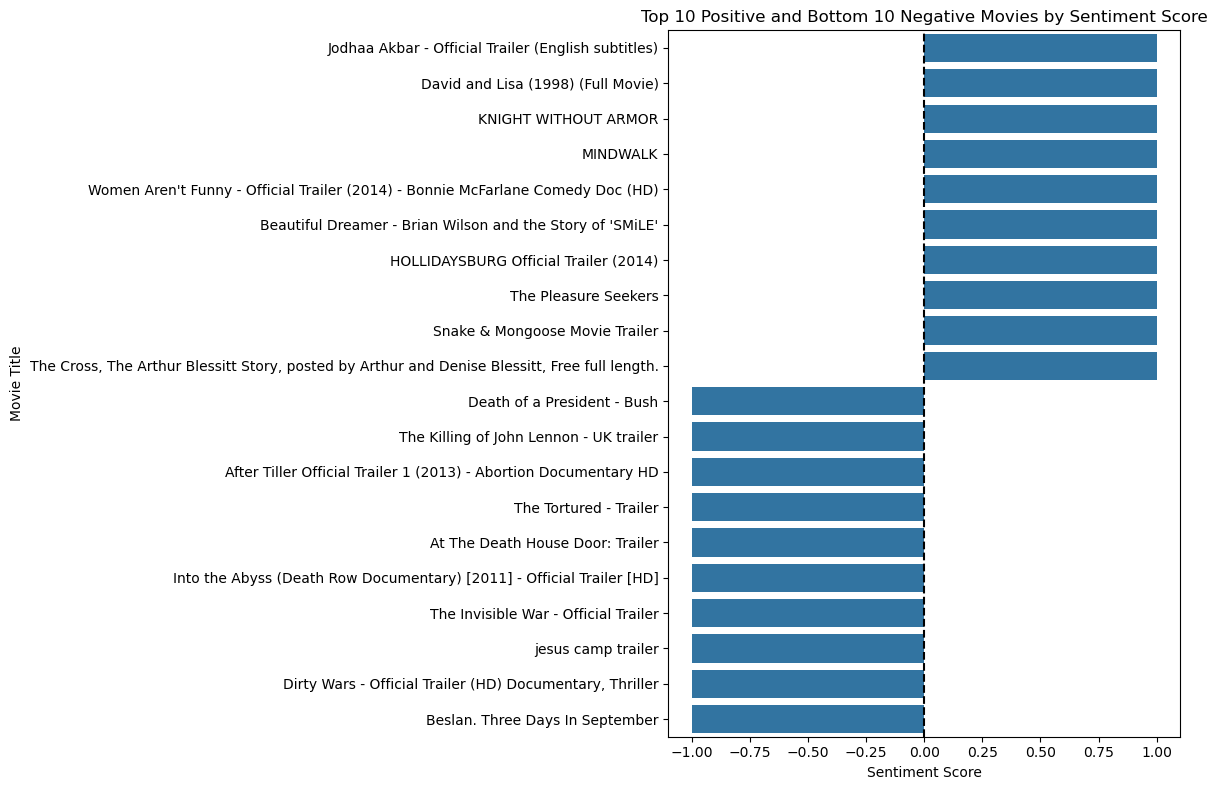

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called 'sample_pd' and has columns 'title' and 'sentiment_score'

# Sort the DataFrame by sentiment score
sorted_df = sample_pd.sort_values('sentiment_score', ascending=False)

# Get top 10 and bottom 10
top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

# Combine into a single DataFrame
plot_df = pd.concat([top_10, bottom_10])

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment_score', y='title', data=plot_df, orient='h')

# Customize the plot
plt.title('Top 10 Positive and Bottom 10 Negative Movies by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')

# Add a vertical line at x=0 to separate positive and negative scores
plt.axvline(x=0, color='black', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

In [183]:
sample_pd[sample_pd['title'] == 'jesus camp trailer'].index

Index([8095], dtype='int64')

In [181]:
sample_pd.iloc[8911]

Unnamed: 0                                                        8911
title                Jodhaa Akbar - Official Trailer (English subti...
desc                 Watch the official trailer of the movie Jodhaa...
Date                                                        2010-04-12
comments             [{'comment': 'Guys, where can I watch the full...
duration                                                       PT4M10S
viewCount                                                     817301.0
likeCount                                                       1132.0
commentCount                                                     112.0
favoriteCount                                                        0
time_cleaned                                           0 days 00:04:10
Days                                                                 0
Hours                                                                0
Minutes                                                              4
Second

In [185]:
sample_pd.iloc[8095]

Unnamed: 0                                                        8095
title                                               jesus camp trailer
desc                 here is the trailer for the movie jesus camp\r...
Date                                                        2006-08-27
comments             [{'comment': '1.dont ask questions <br>2.dont ...
duration                                                       PT2M11S
viewCount                                                     811115.0
likeCount                                                       1015.0
commentCount                                                    2595.0
favoriteCount                                                        0
time_cleaned                                           0 days 00:02:11
Days                                                                 0
Hours                                                                0
Minutes                                                              2
Second

In [187]:
sample_pd.iloc[8095][4]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_23277/4028245263.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[8095][4]


'[{\'comment\': \'1.dont ask questions <br>2.dont have phones(to record anything shady or call for help)<br>3.sleep deprivation <br>4.intimidation<br>5.physical exhaustion <br>6.gaslight<br><br>There is nothing more sick and evil than using the name of God for clearly evil and sadism.<br><br>Im sorry for this\', \'user_id\': \'UCyXAgLUvRqS1urj6vY1-smw\'}, {\'comment\': \'Why do adults who choose a religious lifestyle always spend a lot of time with young children? It must be a sexual thing. Sick.\', \'user_id\': \'UC5WD3fk9GxIfTzLOUs_IJDA\'}, {\'comment\': \'This trailer managed to open too many closed wounds. The look on those kids faces is all too Real, i would know, as a child my Dad would take us too those same types of church, i was only 7 so i really did believe that the end of times were coming and that i had to give my life too God or i would burn in hell. THERES MORE…. Then my Dad became a pastor by the time i was 12, He took it very Seriously. We had 3 services and 2 rehearsa

In [189]:
sample_pd.iloc[8911][4]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_23277/3380896323.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[8911][4]


'[{\'comment\': \'Guys, where can I watch the full movie of this movie in HD? Please... Thank you :)\', \'user_id\': \'UCcHPZVrH5V7pGUwhFVOUwng\'}, {\'comment\': \'aishwarya ...princess...stunning\', \'user_id\': \'UCDIXuHGz6ENwOB4TDkWkY7A\'}, {\'comment\': \'Where can I download this movie guys? Please.....\', \'user_id\': \'UCR5BCanrl6YOoLBawLh9g0A\'}, {\'comment\': \'If this movie had released today with SS Rajamouli as Action director, It would have been one heck of a success!!!\', \'user_id\': \'UChI5pNmxJahmPej2VCl51pg\'}, {\'comment\': \'Hrithik aish good couple in this movie\', \'user_id\': \'UC9hR-nJzPtIa7_Uq5ZTTJPA\'}, {\'comment\': \'thats what I like about my country..we should respect each other religon...\', \'user_id\': \'UCtkSZr641dBMQBmqxFJq2Qw\'}, {\'comment\': \'can someone just tell me were can I find this movie with subs x.x I been searching for one hour already and nada  nothing\', \'user_id\': \'UCTZK5oPNOu917aEYFINoxyQ\'}, {\'comment\': \'Full movie pls\', \'use

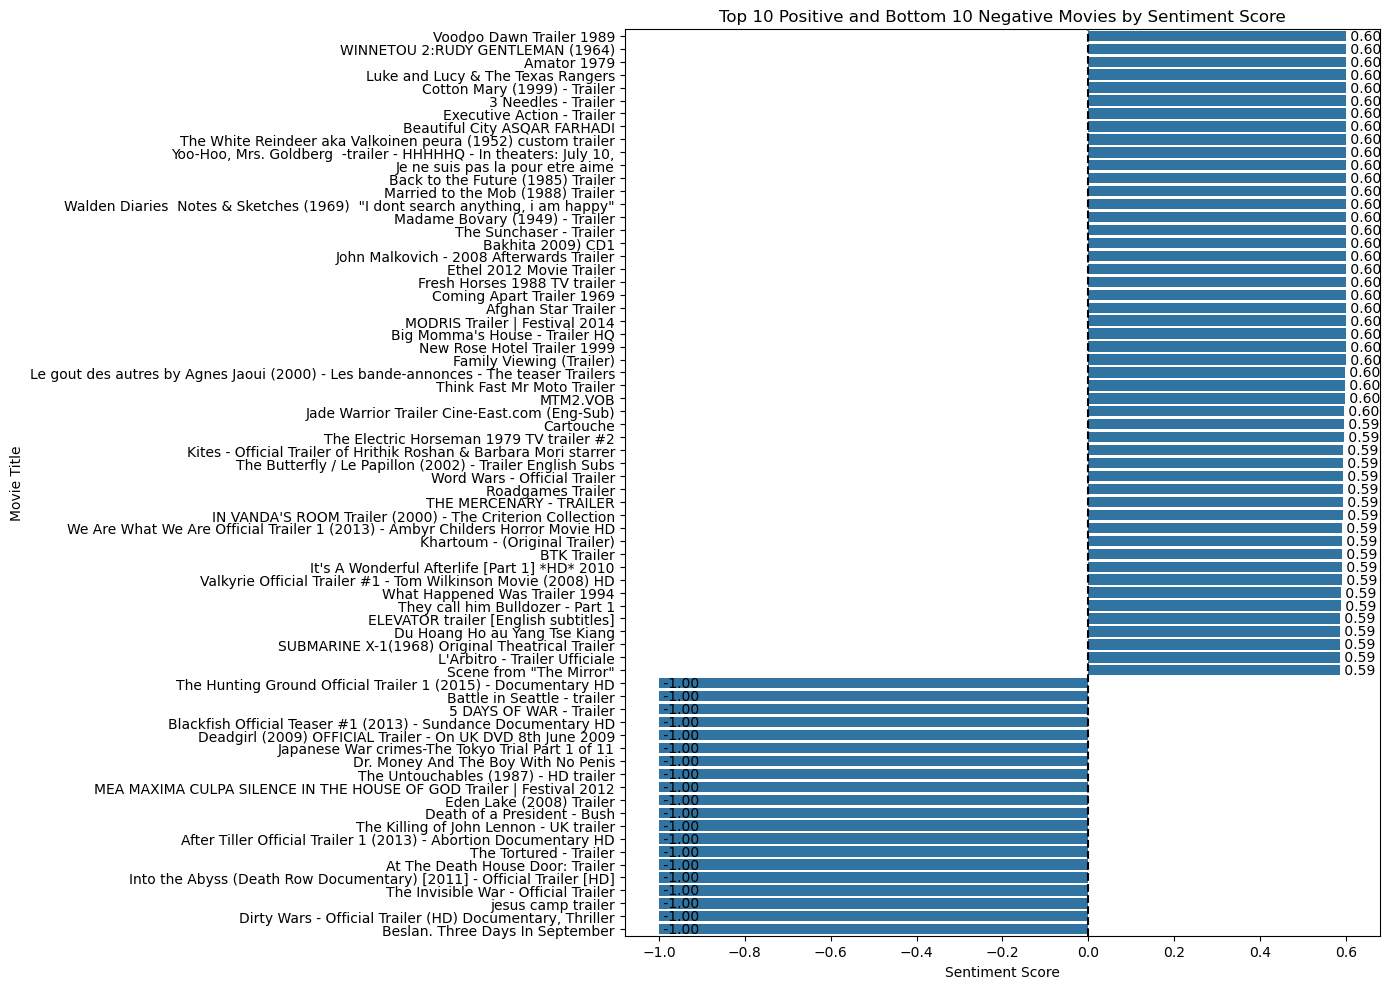

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by sentiment score
sorted_df = sample_pd.sort_values('sentiment_score', ascending=False)

# Get top 10 and bottom 10
top_10 = sorted_df[11500:11550]
bottom_10 = sorted_df.tail(20)

# Combine into a single DataFrame
plot_df = pd.concat([top_10, bottom_10])

# Create the plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='sentiment_score', y='title', data=plot_df, orient='h')

# Customize the plot
plt.title('Top 10 Positive and Bottom 10 Negative Movies by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')

# Add a vertical line at x=0 to separate positive and negative scores
plt.axvline(x=0, color='black', linestyle='--')

# Add text annotations for sentiment scores
for i, v in enumerate(plot_df['sentiment_score']):
    ax.text(v, i, f' {v:.2f}', va='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()